<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Projects/blob/main/Tashkent_housing_prices_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [170]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv"
df = pd.read_csv(URL)[['district', 'rooms', 'size', 'level', 'max_levels', 'price']]
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000


In [171]:
df.shape

(7565, 6)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.7+ KB


In [173]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


# Ustunlar ta'rifi
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [174]:
df = df[df['price'] != 'Договорная']
df = df.replace('Площадьземли:1сот', 100)

df['price'] = df['price'].astype(dtype = int)
df['size'] = df['size'].astype(dtype = float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7466 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7466 non-null   object 
 1   rooms       7466 non-null   int64  
 2   size        7466 non-null   float64
 3   level       7466 non-null   int64  
 4   max_levels  7466 non-null   int64  
 5   price       7466 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 408.3+ KB


In [175]:
df['price_per_size'] = df['price'] / df['size']
df.head()

,district,rooms,size,level,max_levels,price,price_per_size
0,Юнусабадский,3,57.0,4,4,52000,912.280702
1,Яккасарайский,2,52.0,4,5,56000,1076.923077
2,Чиланзарский,2,42.0,4,4,37000,880.952381
3,Чиланзарский,3,65.0,1,4,49500,761.538462
4,Чиланзарский,3,70.0,3,5,55000,785.714286


array([[<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'max_levels'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_per_size'}>]], dtype=object)

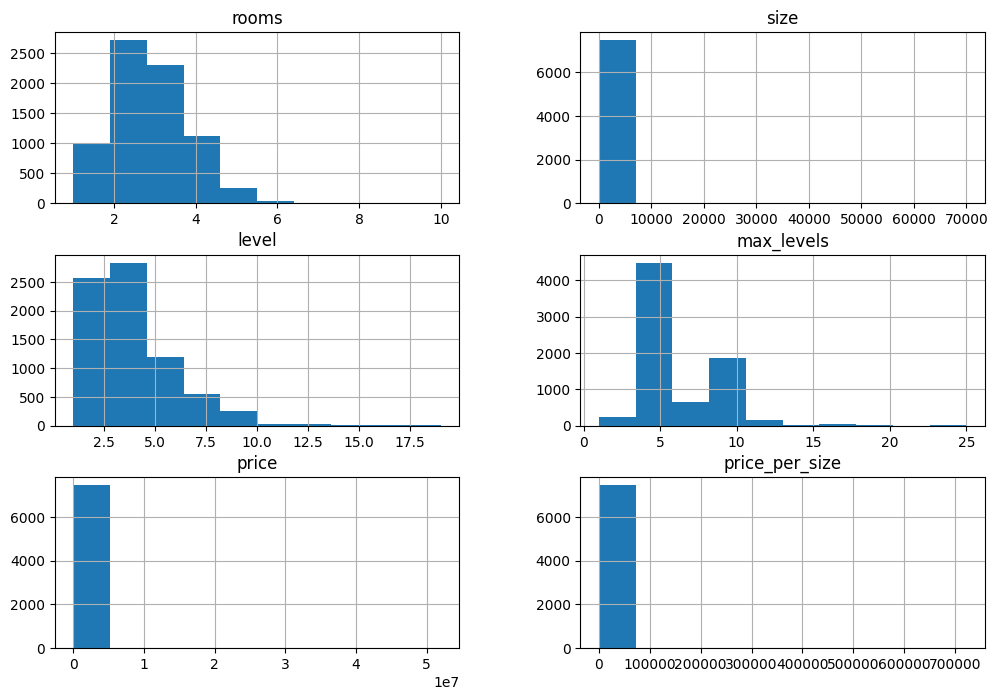

In [176]:
df.hist(bins = 10, figsize=(12,8))

In [177]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 12)
X_train = train_set.drop('price', axis = 1)
y_train = train_set['price']
X_test = test_set.drop('price', axis = 1)
y_test = test_set['price']

In [178]:
X_train

,district,rooms,size,level,max_levels,price_per_size
2717,Чиланзарский,4,80.00,5,5,687.500000
1497,Чиланзарский,2,65.00,2,12,1000.000000
5276,Яшнободский,3,63.00,4,4,633.333333
7056,Олмазорский,5,100.00,3,4,570.000000
6000,Олмазорский,2,57.00,5,5,614.035088
...,...,...,...,...,...,...
7508,Учтепинский,1,36.64,4,4,655.021834
3357,Мирзо-Улугбекский,3,105.00,3,6,1200.000000
1433,Юнусабадский,5,183.50,4,5,1106.267030
5862,Учтепинский,3,80.00,3,12,593.750000


In [179]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

numeric_attributes = ['rooms', 'size', 'level', 'max_levels', 'price_per_size']
cat_attributes = ['district']

full_pipeline = ColumnTransformer([
    ('num_pipeline', numeric_pipeline, numeric_attributes),
    ('cat_pipeline', OneHotEncoder(), cat_attributes)
])

In [180]:
X_train = full_pipeline.fit_transform(X_train)

##Machine learning

#Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression

MLR_model = LinearRegression()

MLR_model.fit(X_train, y_train)

LinearRegression()

In [182]:
X_test = full_pipeline.transform(X_test)
y_predict = MLR_model.predict(X_test)

In [183]:
pd.DataFrame({"Real narx" : y_test,"Bashorat" : y_predict})

,Real narx,Bashorat
2504,74500,85837.226533
5068,170000,114428.473334
6996,36500,41474.461884
1880,39000,39255.359560
5383,47500,56929.724510
...,...,...
4350,95000,56292.368886
5066,21000,35119.203290
1518,64000,78428.937314
3161,219000,119071.950768


In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [185]:
MSE = np.sqrt(mean_squared_error(y_test, y_predict))
MAE = mean_absolute_error(y_test, y_predict)

print(f'MAE : {MAE}\nMSE : {MSE}')

MAE : 17202.548263005912
MSE : 56398.70474212443


In [186]:
X = df.drop('price', axis = 1)
y = df['price']
X = full_pipeline.fit_transform(X)

def show_scores(scores):
    print(f'Scores : {scores}')
    print("Mean_score: ", scores.mean())
    print("Standart deviation: ", scores.std())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(MLR_model, X, y, cv = 10, scoring="neg_mean_squared_error")

show_scores(np.sqrt(-scores))

Scores : [ 33240.04133535  29112.61300263 144276.54100353  50973.80032179
  31196.19359031  40507.72659001  78151.29117153 430203.16442029
  44228.66430645 228154.00952473]
Mean_score:  111004.40452666068
Standart deviation:  122455.54587252515


#Random Forest

In [189]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [191]:
y_predict = RF_model.predict(X_test)

In [192]:
MSE = np.sqrt(mean_squared_error(y_test, y_predict))
MAE = mean_absolute_error(y_test, y_predict)

print(f'MAE : {MAE}\nMSE : {MSE}')

MAE : 4240.703882195448
MSE : 89113.01967979861


In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X, y, cv = 10, scoring="neg_mean_squared_error")

show_scores(np.sqrt(-scores))

Scores : [  36228.38021533    2391.25612339  114370.71212271    7616.22800164
    8633.27954119    5149.02798411   18148.32323399 1559550.82711398
   49443.94191305  463284.36608356]
Mean_score:  226481.6342332947
Standart deviation:  463812.87941924576


#Decision Tree model

In [194]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()

DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [195]:
y_predict = DT_model.predict(X_test)

MSE = np.sqrt(mean_squared_error(y_test, y_predict))
MAE = mean_absolute_error(y_test, y_predict)

print(f'MAE : {MAE}\nMSE : {MSE}')

MAE : 5958.317269076305
MSE : 128228.52112261076


In [196]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT_model, X, y, cv = 10, scoring="neg_mean_squared_error")

show_scores(np.sqrt(-scores))

Scores : [  37466.99822248    4872.29755487  154796.42777289    6768.19190468
    9655.14264881    9296.16872011   10819.18699818 1700007.29274097
   49761.08598217  426920.36651959]
Mean_score:  241036.31590647675
Standart deviation:  501947.09458209755


In [199]:
import pickle

with open('RF_model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)